## **Problem Definition** 

The **Iris flower data set**** or **Fisher's Iris data set** is a multivariate data set used and made famous by the British statistician and biologist **Ronald Fisher** in his** 1936 paper**. The use of multiple measurements in taxonomic problems as an example of `linear discriminant analysis`. 

It is sometimes called **Anderson's Iris data set** because **Edgar Anderson** collected the data to quantify the morphologic variation of Iris flowers of three related species. 
Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

## **Dataset Content**

The data set consists of **50 samples from each of three species of Iris** (`Iris setosa`, `Iris virginica` and `Iris versicolor`). 

**Four features** were measured from each sample: 
* **The length of the sepals, in centimeters..**  
* **The length of the petals, in centimeters..**  
* **The width of the sepals, in centimeters.** 
* **The width of the petals, in centimeters.** 

Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. Fisher's paper was published in the *Annals of Eugenics* and includes discussion of the **contained techniques' applications to the field of phrenology**.

### What is a Feature in Machine Learning?

**In machine learning and pattern recognition, a feature is an individual measurable property or characteristic of a phenomenon. Choosing informative, discriminating and independent features is a crucial element of effective algorithms in pattern recognition, classification and regression.** 

## **Evaluation**

Originally used as an example data set on which *Fisher's linear discriminant analysis* was applied, it became a typical test case for many statistical **classification techniques** in machine learning such as support vector machines.

**In this project we will use this case for studies and learning purposes.**


## **Data Set**

The dataset contains a set of **150 records** under **five attributes** - `sepal length`, `sepal width`, `petal length`, `petal width` and `species`.

You can find the original data set in the Machine Learning package [Scikit - Learn](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) page.





---



In [1]:
# Regular EDA and Plotting Libraries
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# load the iris dataset
from sklearn.datasets import load_iris
load_iris = load_iris()

In [3]:
def setting_iris_dataframe():
  '''
  Creating iris dataframe with datas stored in iris data set
  '''
  
  legend_map = {1: 'setosa',
              2: 'versicolor',
              3: 'virginica'}

  data = load_iris.data
  target = load_iris.target
  feature_names = load_iris.feature_names
  target_names = load_iris.target_names

  iris = pd.DataFrame(data, columns = feature_names)
  iris['target'] = target
  iris['species'] = target_names[target]
  
  # Turn categorical variables into numbers
  for label, content in iris.items():
      # Check columns which *aren't* numeric
      if not pd.api.types.is_numeric_dtype(content):
          # We add the +1 because pandas encodes missing categories as -1
          iris[label] = pd.Categorical(content).codes+1

  return iris


In [5]:
# creating iris dataframe
iris = setting_iris_dataframe()
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    int8   
dtypes: float64(4), int64(1), int8(1)
memory usage: 6.1 KB


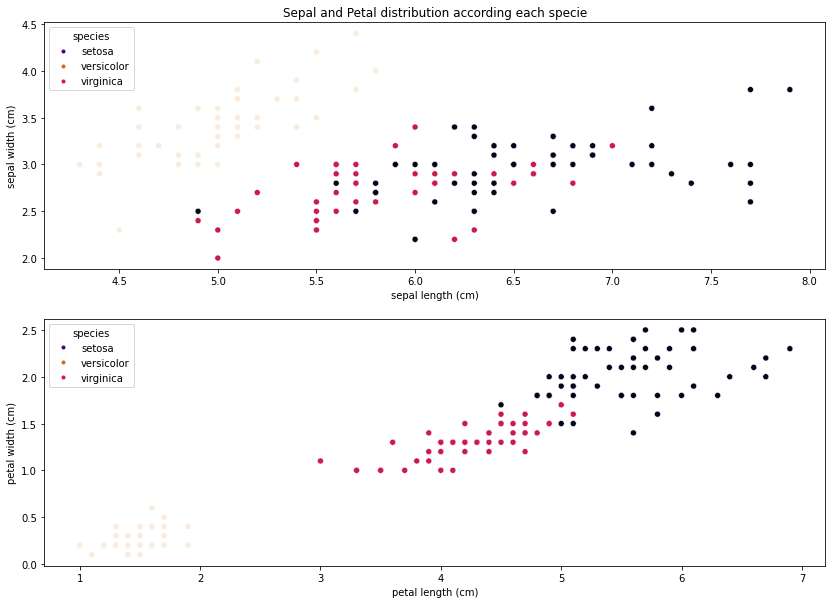

In [146]:
# let's visualize our data set and take a better comprehension.
from matplotlib.lines import Line2D
fig, axs = plt.subplots(nrows = 2, figsize = (14,10))
palette = sns.color_palette("rocket_r", as_cmap=True)

custom = [Line2D([], [], marker='.', color='indigo', linestyle='None'),
          Line2D([], [], marker='.', color='chocolate', linestyle='None'),
          Line2D([], [], marker='.', color='crimson', linestyle='None')]

sns.scatterplot(data = iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='species', palette = palette, ax = axs[0]);
axs[0].set(title = 'Sepal and Petal distribution according each specie');
axs[0].legend(custom, ['setosa','versicolor', 'virginica'], title = 'species',loc = 'upper left');
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species', palette = palette, ax = axs[1]);
axs[1].legend(custom, ['setosa','versicolor', 'virginica'], title = 'species', loc = 'upper left');

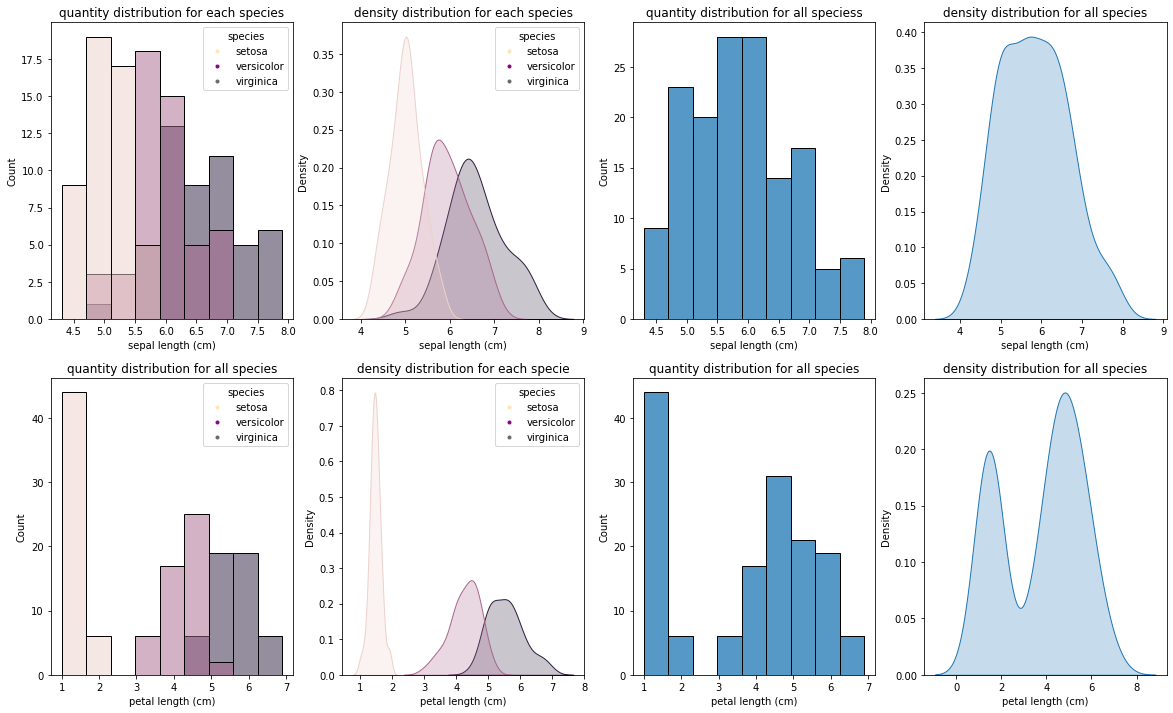

In [147]:
# hisograms distributions
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20,12))

custom = [Line2D([], [], marker='.', color='moccasin', linestyle='None'),
          Line2D([], [], marker='.', color='darkmagenta', linestyle='None'),
          Line2D([], [], marker='.', color='dimgray', linestyle='None')]

axs[0][0].set(title = 'quantity distribution for each species');
sns.histplot(data = iris, x = iris['sepal length (cm)'], hue = 'target',ax = axs[0][0]);
axs[0][1].set(title = 'density distribution for each species');
sns.kdeplot(data = iris, x = iris['sepal length (cm)'], hue = 'target', ax = axs[0][1], shade = True);

axs[0][2].set(title = 'quantity distribution for all speciess');
sns.histplot(data = iris, x = iris['sepal length (cm)'], ax = axs[0][2]);
axs[0][3].set(title = 'density distribution for all species');
sns.kdeplot(data = iris, x = iris['sepal length (cm)'], ax = axs[0][3], shade = True);

axs[1][0].set(title = 'quantity distribution for all species');
sns.histplot(data = iris, x = iris['petal length (cm)'], hue = 'target', ax = axs[1][0]);
axs[1][1].set(title = 'density distribution for each specie');
sns.kdeplot(data = iris, x = iris['petal length (cm)'], hue = 'target', ax = axs[1][1], shade = True);

axs[1][2].set(title = 'quantity distribution for all species');
sns.histplot(data = iris, x = iris['petal length (cm)'], ax = axs[1][2]);
axs[1][3].set(title = 'density distribution for all species');
sns.kdeplot(data = iris, x = iris['petal length (cm)'], ax = axs[1][3], shade = True);

for row in range(2):
  for col in range(2):
    axs[row][col].legend(custom, ['setosa','versicolor', 'virginica'], title = 'species',loc = 'upper right');


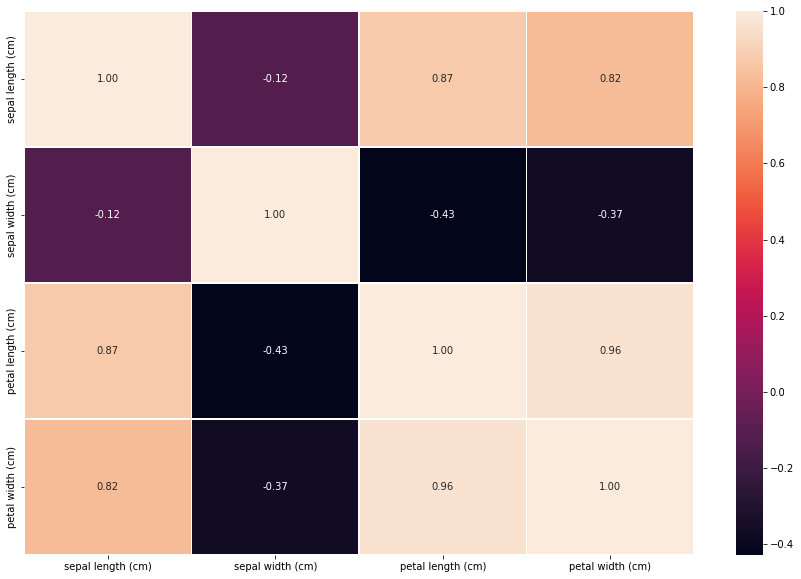

In [ ]:
# Correlation between independent variables
'''
This may give an idea of which independent variables may or may not have an impact on our target variable.
'''
corr_matrix = iris.drop(['target', 'species'], axis = 1).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True,  linewidths=0.5, fmt= ".2f");

In [6]:
#Split data into training and validation sets
X = iris.drop(['target', 'species'], axis = 1)
y = iris['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((120, 4), (30, 4), (120,), (30,))

In [149]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_valid, y_train, y_valid):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_valid : validation data
    y_train : labels assosciated with training data
    y_valid : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(0)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_valid, y_valid)
    return model_scores

In [150]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_valid=X_valid,
                             y_train=y_train,
                             y_valid=y_valid)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.9333333333333333,
 'Logistic Regression': 0.9333333333333333,
 'Random Forest': 0.9}



```
As we can see, there are extremaly good results for the three models.
```



## **Model Comparison**

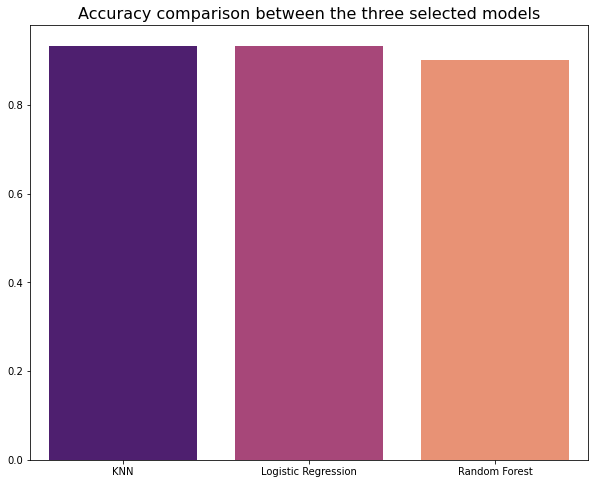

In [151]:
# lets visualize the results in a simple bar graph
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])

# simple bar graph comparison
plt.figure(figsize = (10,8))
sns.barplot(data = model_compare, palette = 'magma');
plt.title('Accuracy comparison between the three selected models', fontsize = 16);

In [ ]:
# Different KNN hyperparameters
knn_grid  = {"n_neighbors": np.arange(5,20,1),
              "leaf_size": np.arange(20,40,1)
             }
                
# Setup random seed
np.random.seed(0)

# Setup random hyperparameter search for KNN
gs_knn = GridSearchCV(KNeighborsClassifier(),
                                param_grid=knn_grid,
                                cv=5,
                                verbose=True)

# Fit random hyperparameter search model
gs_knn.fit(X_train, y_train);

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [ ]:
# Check the best parameters
gs_knn.best_params_

{'leaf_size': 20, 'n_neighbors': 7}

In [ ]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10]}

gs_rf = GridSearchCV(RandomForestClassifier(),
                              param_grid=rf_grid,
                              cv=5,
                              verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [ ]:
# Check the best parameters
gs_rf.best_params_

{'max_depth': 3, 'n_estimators': 260}

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 545.5594781168514, 'solver': 'liblinear'}

In [ ]:
def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation comparison on y_true labels vs. y_pred labels
  on a classification.
  """
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds,   average='micro')
  recall = recall_score(y_true, y_preds,  average='micro')
  f1 = f1_score(y_true, y_preds, average='micro')
  metric_dict = {"accuracy": accuracy,
                  "precision": precision,
                  "recall": recall,
                  "f1": f1}
  print(f"Acc: {accuracy * 100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 score: {f1:.2f}")
  return metric_dict

## **Evaluating a classification model, beyond accuracy**

Evaluations parameters: 
* `ROC curve and AUC score` - plot_roc_curve()
* `Confusion matrix` - confusion_matrix()
* `Accuracy` - accuracy_score()
* `Precision` - precision_score()
* `Recall` - recall_score()
* `F1-score` - f1_score()

In [ ]:
# Make preidctions on test data
y_preds_knn = gs_knn.predict(X_valid)
y_preds_r_f = gs_rf.predict(X_valid)
y_preds_log_reg = gs_log_reg.predict(X_valid)

In [ ]:
knn_score = evaluate_preds(y_valid, y_preds_knn)

Acc: 93.33%
Precision: 0.93
Recall: 0.93
F1 score: 0.93


In [ ]:
rf_score = evaluate_preds(y_valid, y_preds_r_f)

Acc: 90.00%
Precision: 0.90
Recall: 0.90
F1 score: 0.90


In [ ]:
log_reg_score = evaluate_preds(y_valid, y_preds_log_reg)

Acc: 93.33%
Precision: 0.93
Recall: 0.93
F1 score: 0.93


## **Confusion matrix**

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

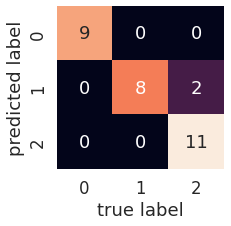

In [ ]:
plot_conf_mat(y_valid, y_preds_log_reg)

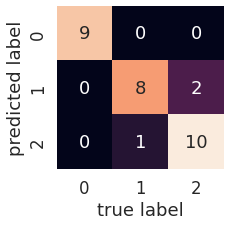

In [ ]:
plot_conf_mat(y_valid, y_preds_r_f)

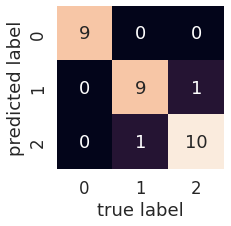

In [ ]:
plot_conf_mat(y_valid, y_preds_knn)

## **Classification Report**

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

We'll take the best model along with the best hyperparameters and use `cross_val_score()` along with various scoring parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [ ]:
# Evaluate the model
knn = KNeighborsClassifier(leaf_size = 20, n_neighbors = 7)
knn_scores = evaluate_preds(y_valid, y_preds_knn);

Acc: 93.33%
Precision: 0.93
Recall: 0.93
F1 score: 0.93


In [ ]:
# Check the best parameters
gs_knn.best_params_

{'leaf_size': 20, 'n_neighbors': 7}

In [ ]:
# Evaluate the model
rf = RandomForestClassifier(max_depth  =3, n_estimators = 260)
rf_scores = evaluate_preds(y_valid, y_preds_r_f);

Acc: 90.00%
Precision: 0.90
Recall: 0.90
F1 score: 0.90


In [ ]:
# Check the best parameters
gs_rf.best_params_

{'max_depth': 3, 'n_estimators': 260}

In [ ]:
# Evaluate the model
clf = LogisticRegression(C=545.5594781168514, solver="liblinear")
clf_scores = evaluate_preds(y_valid, y_preds_log_reg);

Acc: 93.33%
Precision: 0.93
Recall: 0.93
F1 score: 0.93


In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 545.5594781168514, 'solver': 'liblinear'}

## **Feature importance**

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

**The larger the value (bigger bar), the more the feature contributes to the models decision.**

**If the value is negative, it means there's a negative correlation. And vice versa for positive values.**

In [ ]:
# Fit an instance of LogisticRegression (taken from above)
np.random.seed(0)
knn.fit(X_train, y_train);
rf.fit(X_train, y_train);
clf.fit(X_train, y_train);

In [ ]:
# Check classes_
knn.classes_

array([0, 1, 2])

In [ ]:
# Match features to columns
features_dict = dict(zip(iris.drop(['target', 'species'], axis = 1).columns, list(clf.coef_[0])))
features_dict

{'sepal length (cm)': 0.8753607305793324,
 'sepal width (cm)': 4.011905246013102,
 'petal length (cm)': -5.755207433497693,
 'petal width (cm)': -2.7929707731800026}

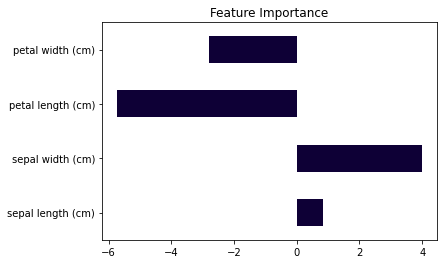

In [154]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.barh(title="Feature Importance", legend=False, color = '#0e0036' );

In the KNN Model we can see that the features **sepal width** has the bigger contribution to our model to predict correctly.

In [126]:
# Check classes_
rf.classes_

array([0, 1, 2])

In [124]:
# Match features to columns
features_dict = dict(zip(iris.drop(['target', 'species'], axis = 1).columns, list(clf.coef_[0])))
features_dict

{'sepal length (cm)': 0.8420042431132445,
 'sepal width (cm)': 3.9775727869334414,
 'petal length (cm)': -5.72417843457772,
 'petal width (cm)': -2.801542817831683}

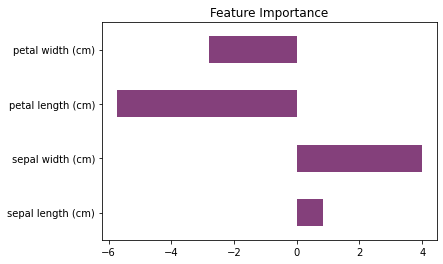

In [153]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.barh(title="Feature Importance", legend=False, color = '#84407b');

The same occuried in the **RandomForestClassifier** Model.

In [121]:
# Check coef_
clf.coef_

array([[ 0.84200424,  3.97757279, -5.72417843, -2.80154282],
       [ 0.30750894, -3.9590049 ,  0.85202424, -2.86262486],
       [-3.63280294, -2.92863794,  6.7342197 , 15.7076661 ]])

In [122]:
# Match features to columns
features_dict = dict(zip(iris.drop(['target', 'species'], axis = 1).columns, list(clf.coef_[0])))
features_dict

{'sepal length (cm)': 0.8420042431132445,
 'sepal width (cm)': 3.9775727869334414,
 'petal length (cm)': -5.72417843457772,
 'petal width (cm)': -2.801542817831683}

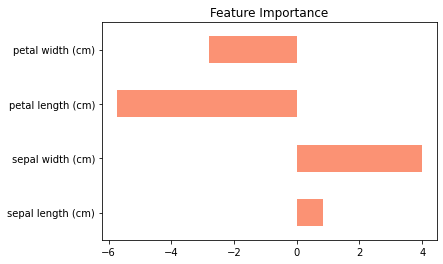

In [155]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.barh(title="Feature Importance", legend=False, color = '#fb9274');

And in the **LogisticRegression** Model.

---